In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import pyabeles as pa
%matplotlib inline

In [2]:
STO = pa.Layer(0.,5.0,sigma=5.,name="STO")
LSMO = pa.Layer(0.,6.5, sigma=5., name="LSMO")

## Data 636

In [3]:
data636 = np.genfromtxt('/Users/miro/Desktop/hoffman/xref/notebooks/0636 XRR 0.5 to 8.0 deg 10 sec.xy',delimiter=' ')
theta636 = data636[:,0]
r636 = data636[:,1]
scale = r636[0]
for i in range(0,len(r636)):
    r636[i] /= scale
    theta636[i] /= 2

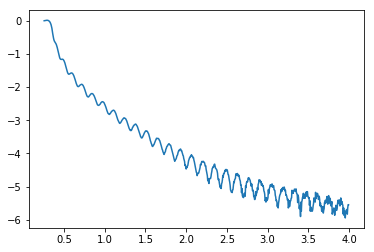

In [4]:
plt.plot(theta636, np.log10(r636))

Defining structure, experiment, and fitter objects:

In [5]:
struct636 = LSMO.set_thickness(300.)+STO
exp636 = struct636.doExperiment(theta636, R=r636)
model = pa.Fitter(exp636,method="de",cutoff_begin=0,cutoff_end=700)

Fitting,

In [6]:
fit636 = model.fit()

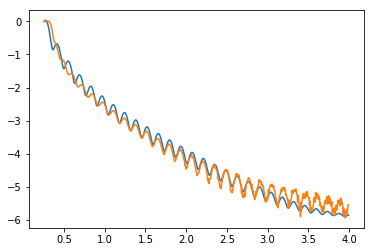

In [7]:
rFit = exp636.genTheory(modify=False)
plt.plot(theta636[0:],np.log10(rFit[0:]))
plt.plot(theta636[0:],np.log10(r636[0:]))

Calculated thickness of LSMO layer in nm

In [8]:
calcD = fit636[0].d[1]/10

In [9]:
print "Thickness Error: %f%%" % (100*(calcD-31.3410)/31.3410)

Thickness Error: 1.674103%


## Data 735

In [41]:
MgO = pa.Layer(0.,4.,sigma=10.,name="MgO")
NiO = pa.Layer(0.,6.6,sigma=5.,name="NiO")

In [42]:
data735 = np.genfromtxt('/Users/miro/Desktop/hoffman/xref/notebooks/0735 XRR 0.5 to 8 deg 10 sec.xy',delimiter=' ')
theta735 = data735[:,0]
r735 = data735[:,1]
scale = r735[0]
for i in range(0,len(r735)):
    r735[i] /= scale
    theta735[i] /= 2

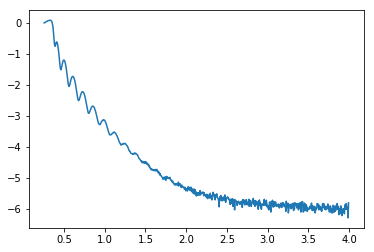

In [43]:
plt.plot(theta735, np.log10(r735))

In [44]:
struct735 = NiO.set_thickness(300.)+MgO
exp735 = struct735.doExperiment(theta735, R=r735)
model = pa.Fitter(exp735,method="de",cutoff_begin=0,cutoff_end=400)

In [45]:
fit735 = model.fit()

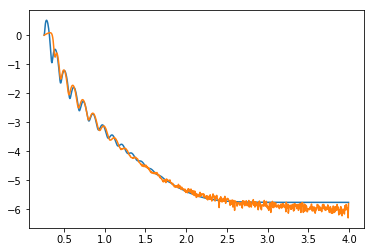

In [46]:
rFit = exp735.genTheory(modify=False)
plt.plot(theta735[0:],np.log10(rFit[0:]))
plt.plot(theta735[0:],np.log10(r735[0:]))

In [48]:
calcD = fit735[0].d[1]/10
print "Thickness error: %f%%" % (100*np.abs(calcD-30.902)/30.902)
print "Thickness found to be %f nm" % calcD

Thickness error: 18.921952%
Thickness found to be 36.749262 nm


In [50]:
fit735[0].rho

array([ 0.        ,  8.21124382,  4.50265218])

In [49]:
fit735[1]

array([  7.60191249e-01,   2.00000000e-06,  -6.82341215e-02,
         3.44068296e+00,   3.67492617e+02,   8.21124382e+00,
         4.50265218e+00,   6.24284695e+00,   1.24954923e+01])

## Data 606

Let's start by trying to solve in the high-dimensional parameter space,

In [26]:
data606 = np.genfromtxt('/Users/miro/Desktop/hoffman/xref/notebooks/0606 XRR 0.5 to 15.0 deg 20 sec.xy',delimiter=' ')
theta606 = data606[:,0]
r606 = data606[:,1]
scale = r606[0]
for i in range(0,len(r606)):
    r606[i] /= scale
    theta606[i] /= 2

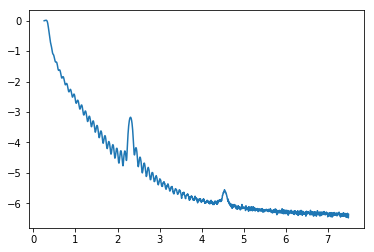

In [27]:
plt.plot(theta606, np.log10(r606))

In [28]:
LNO =  pa.Layer(0.,7.,sigma=3.,name="MgO")
LSMO = pa.Layer(0.,6.5, sigma=2., name="LSMO")

In [29]:
struct606 = pa.Surface()
for i in range(0,3):
    struct606.addLayer(NiO.set_thickness(10.))
    struct606.addLayer(LSMO.set_thickness(10.))
struct606.addLayer(STO)

In [30]:
exp606 = struct606.doExperiment(theta606, R=r606)
model = pa.Fitter(exp606,method="de",cutoff_begin=20,cutoff_end=700)

In [ ]:
model.fit()    